**TODO (questa è sola una bozza)**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matrixprofile import *

In [19]:
df = pd.read_csv("data/time_Series_Data.csv")
df['date'] = pd.to_datetime(df['date'])
df['year_month_week'] = df['date'].dt.to_period('W').dt.strftime('%Y-%m-%W')

weekly_data = df.groupby(['year_month_week', 'city']).size().reset_index(name='incident_count')
weekly_data.dropna(inplace=True)

In [20]:
selected_city = weekly_data.groupby(['city']).count()
selected_city = selected_city[selected_city.year_month_week >= 32].reset_index()['city']
df = weekly_data[weekly_data.city.isin(selected_city)]

df = df.pivot(index="city", columns="year_month_week", values="incident_count")
df.fillna(0, inplace=True)
df.head()

year_month_week,2014-01-00,2014-01-01,2014-01-02,2014-01-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,2014-03-08,2014-03-09,...,2017-10-43,2017-11-44,2017-11-45,2017-11-46,2017-11-47,2017-12-48,2017-12-49,2017-12-50,2017-12-51,2017-12-52
city,,,,,,,,,,,,,,,,,,,,,
Aberdeen,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Abilene,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Aiken,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,2.0,1.0
Akron,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,4.0,1.0,1.0,4.0,2.0,2.0,3.0
Albany,1.0,0.0,5.0,0.0,2.0,0.0,2.0,1.0,1.0,0.0,...,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [21]:
chichago = df.loc['Albany']

/home/kcekini/progetti/DM/.venv/lib/python3.9/site-packages/matrixprofile/utils.py:177: RuntimeWarning: divide by zero encountered in divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))
/home/kcekini/progetti/DM/.venv/lib/python3.9/site-packages/matrixprofile/utils.py:200: RuntimeWarning: divide by zero encountered in divide
  res = 2*m*(1-(dot-m*mean[index]*mean)/(m*std[index]*std))
/home/kcekini/progetti/DM/.venv/lib/python3.9/site-packages/matrixprofile/utils.py:200: RuntimeWarning: invalid value encountered in divide
  res = 2*m*(1-(dot-m*mean[index]*mean)/(m*std[index]*std))


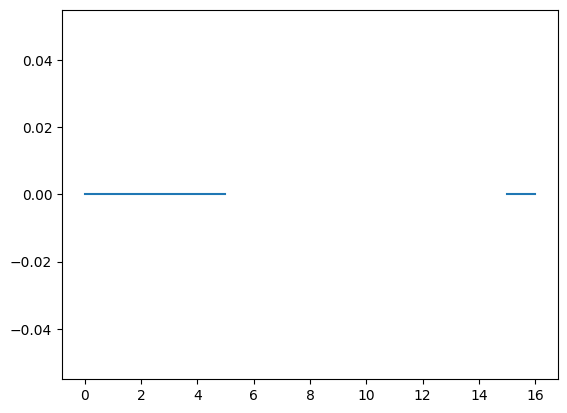

In [22]:
w = 4 # -> circa un mese
mp, mpi = matrixProfile.stomp(chichago.values, w)

plt.plot(mp)
plt.show()

/home/kcekini/progetti/DM/.venv/lib/python3.9/site-packages/matrixprofile/utils.py:177: RuntimeWarning: invalid value encountered in divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))


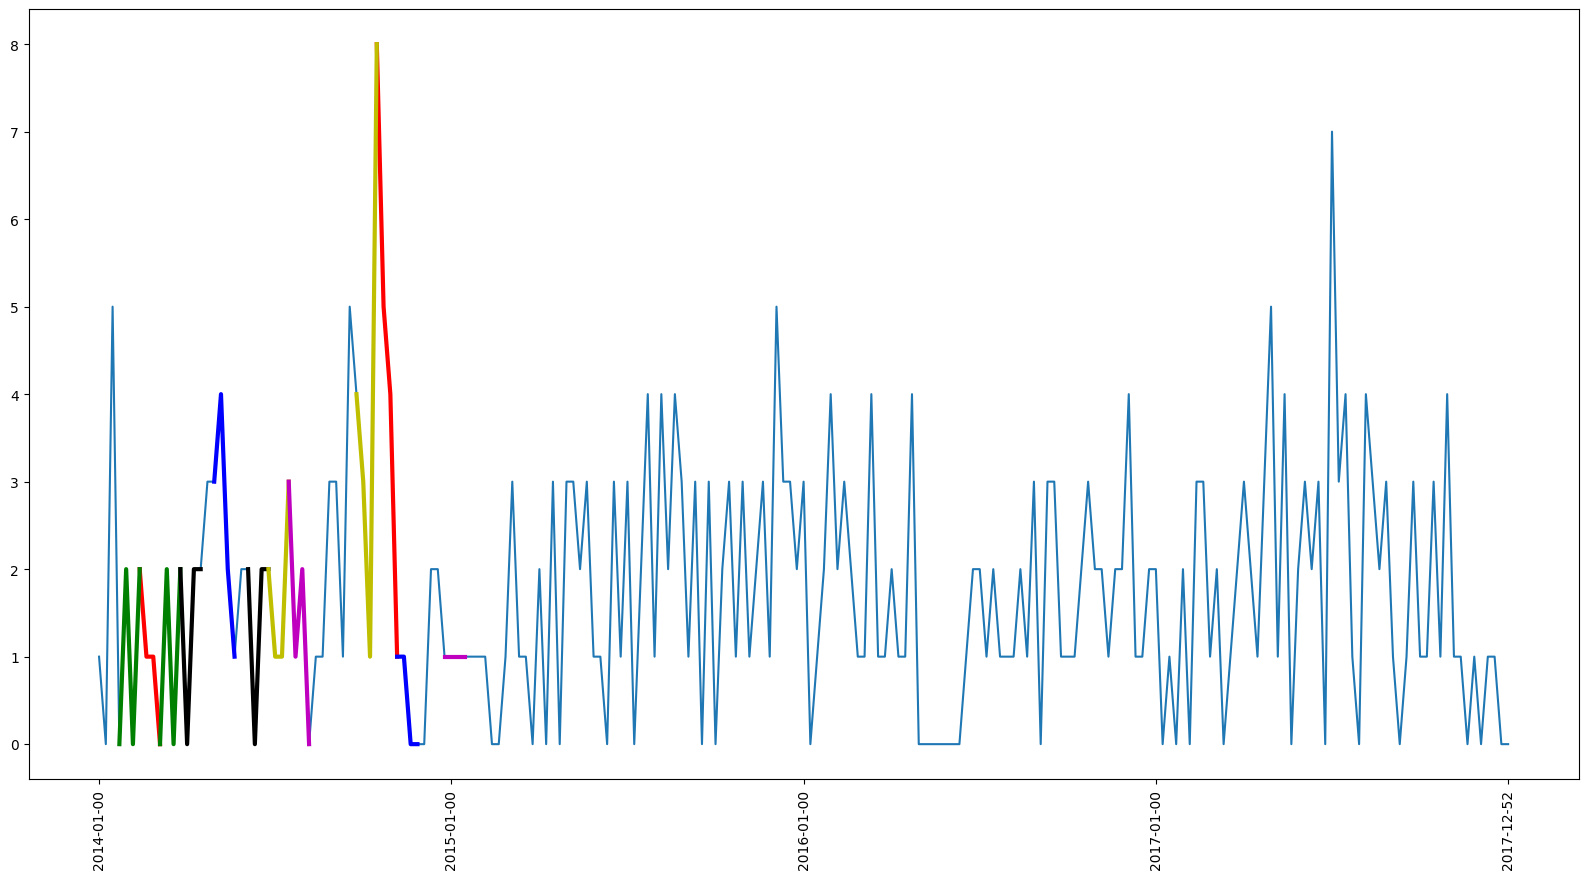

In [23]:
import matplotlib.pyplot as plt

# Assuming chichago, mp, and mpi are defined somewhere in your code

# Get motifs
mo, mod = motifs.motifs(chichago.values, (mp, mpi), max_motifs=10)

# Plotting
plt.figure(figsize=(20, 10))
plt.plot(chichago)
plt.xticks(range(0, len(chichago), 52), chichago.index[::52], rotation=90)

# Existing colors
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]

# Additional colors to add
additional_colors = ['m', 'c', 'orange', 'purple', 'brown', 'pink', 'gray', 'lime', 'teal', 'indigo']

# Extend the existing colors list with additional colors
colors.extend(additional_colors)

# Iterate over motifs and plot
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = chichago.values[i:i+w]
        plt.plot(range(i, i+w), m_shape, color=c, lw=3)

plt.show()


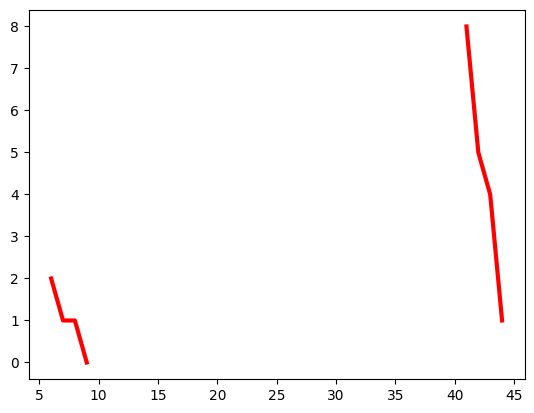

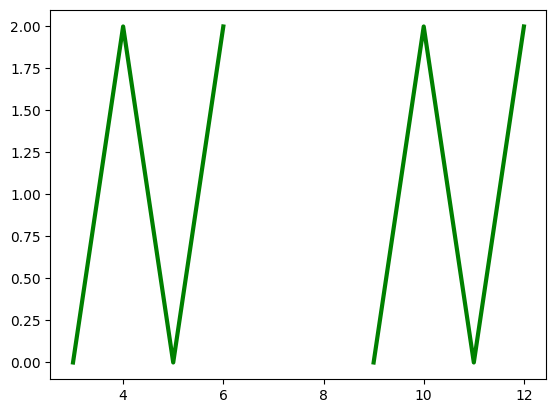

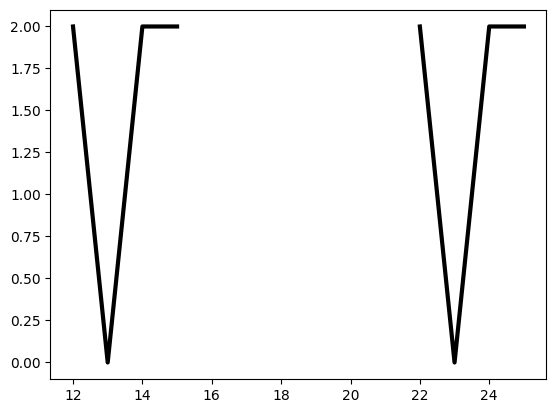

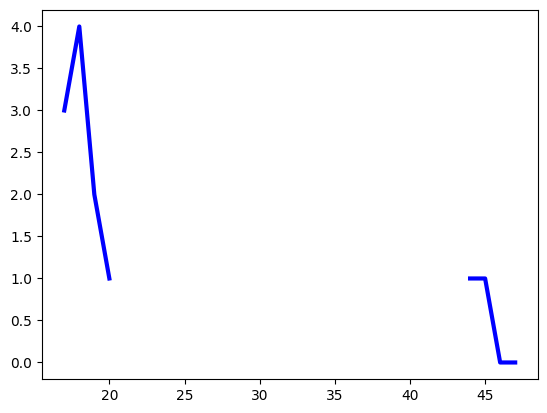

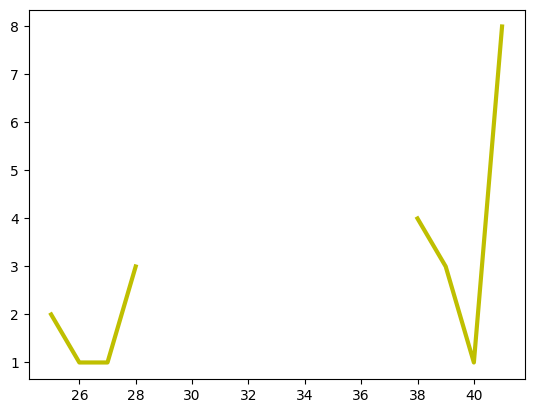

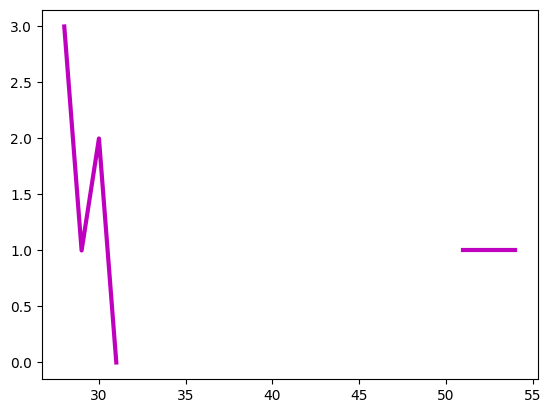

In [24]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = chichago.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()